# Árbol de Decisión

In [1]:
#Librerias

import pandas as pd
from sklearn import tree

In [2]:
# initialize list of lists
data = [[1, 1, 1, 1, 0], [1, 1, 1, 2, 0], [2, 1, 1, 1, 1], [3, 2, 1, 1, 1], [3, 3, 2, 1, 1], [3, 3, 2, 2, 0], [2, 3, 2, 2, 1], [1, 2, 1, 1, 0], [1, 3, 2, 1, 1], [3, 2, 2, 1, 1], [1, 2, 2, 2, 1], [2, 2, 1, 2, 1], [2, 1, 2, 1, 1], [3, 2, 1, 2, 0]]
df = pd.DataFrame(data, columns=['Outlook', 'Temperature', 'Humidity', 'Wind', 'Play'])

df

,Outlook,Temperature,Humidity,Wind,Play
0,1,1,1,1,0
1,1,1,1,2,0
2,2,1,1,1,1
3,3,2,1,1,1
4,3,3,2,1,1
5,3,3,2,2,0
6,2,3,2,2,1
7,1,2,1,1,0
8,1,3,2,1,1
9,3,2,2,1,1


In [4]:
df_x = df.drop(columns=['Play'])
df_y = df['Play']

# Entrenamos el arbol en base a la entropía
myTree = tree.DecisionTreeClassifier(criterion='entropy')
myTree.fit(df_x, df_y)

DecisionTreeClassifier(criterion='entropy')

In [5]:
print(tree.export_text(myTree))

|--- feature_2 <= 1.50
|   |--- feature_0 <= 1.50
|   |   |--- class: 0
|   |--- feature_0 >  1.50
|   |   |--- feature_0 <= 2.50
|   |   |   |--- class: 1
|   |   |--- feature_0 >  2.50
|   |   |   |--- feature_3 <= 1.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  1.50
|   |   |   |   |--- class: 0
|--- feature_2 >  1.50
|   |--- feature_3 <= 1.50
|   |   |--- class: 1
|   |--- feature_3 >  1.50
|   |   |--- feature_0 <= 2.50
|   |   |   |--- class: 1
|   |   |--- feature_0 >  2.50
|   |   |   |--- class: 0



[Text(0.4444444444444444, 0.9, 'x[2] <= 1.5\nentropy = 0.94\nsamples = 14\nvalue = [5, 9]'),
 Text(0.2222222222222222, 0.7, 'x[0] <= 1.5\nentropy = 0.985\nsamples = 7\nvalue = [4, 3]'),
 Text(0.1111111111111111, 0.5, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.3333333333333333, 0.5, 'x[0] <= 2.5\nentropy = 0.811\nsamples = 4\nvalue = [1, 3]'),
 Text(0.2222222222222222, 0.3, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.4444444444444444, 0.3, 'x[3] <= 1.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.3333333333333333, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5555555555555556, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6666666666666666, 0.7, 'x[3] <= 1.5\nentropy = 0.592\nsamples = 7\nvalue = [1, 6]'),
 Text(0.5555555555555556, 0.5, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.7777777777777778, 0.5, 'x[0] <= 2.5\nentropy = 0.918\nsamples = 3\nvalue = [1, 2]'),
 Text(0.6666666666666666, 0.3, 'entropy = 0.0\nsamples

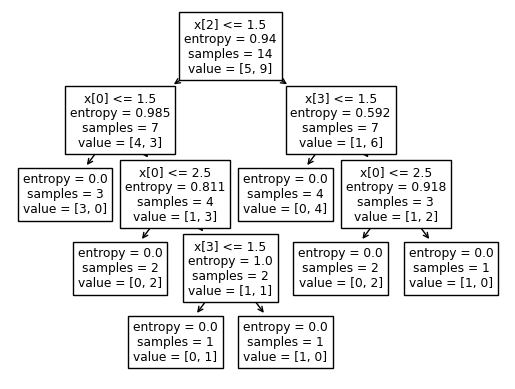

In [6]:
tree.plot_tree(myTree)

Ahora podemos mejorar la calidad del gráfico generado para el árbol, exportando la información y usándola con la librería Graphviz

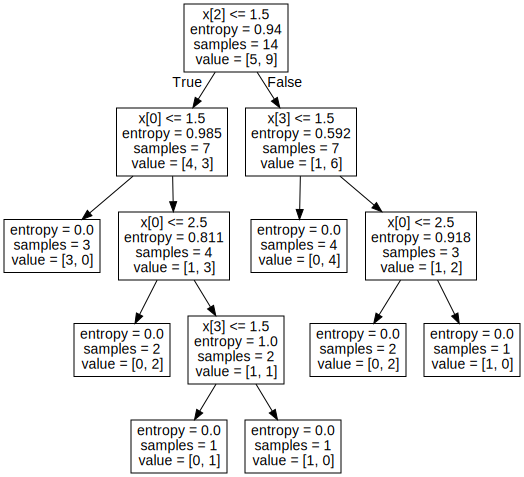

In [7]:
import graphviz

myTreeData = tree.export_graphviz(myTree)
graphData = graphviz.Source(myTreeData)
graphData

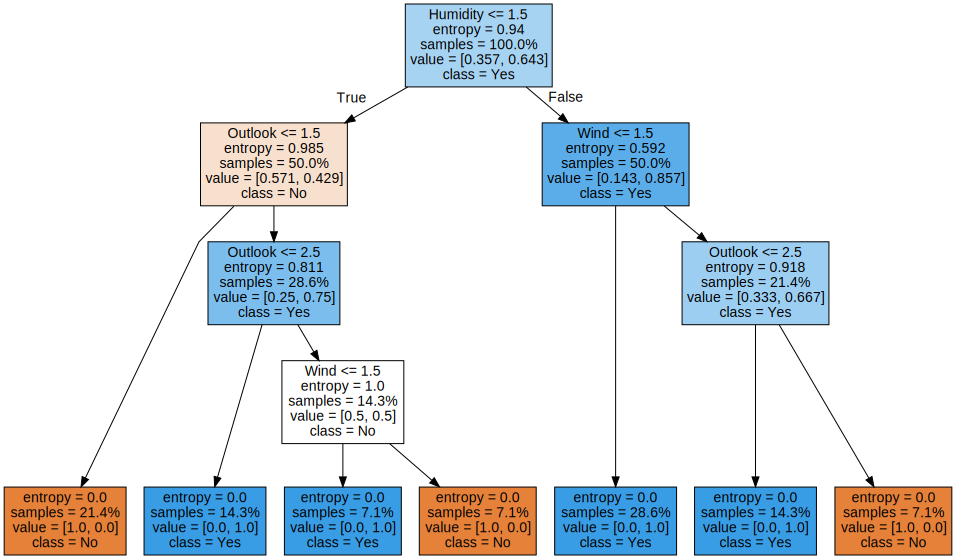

In [8]:
feature_names = ['Outlook', 'Temperature', 'Humidity', 'Wind']
class_names = ['No', 'Yes']
myTreeData = tree.export_graphviz(myTree, feature_names=feature_names,
                                  class_names=class_names, leaves_parallel=True,
                                  filled=True, proportion=True)
graphData = graphviz.Source(myTreeData)
graphData

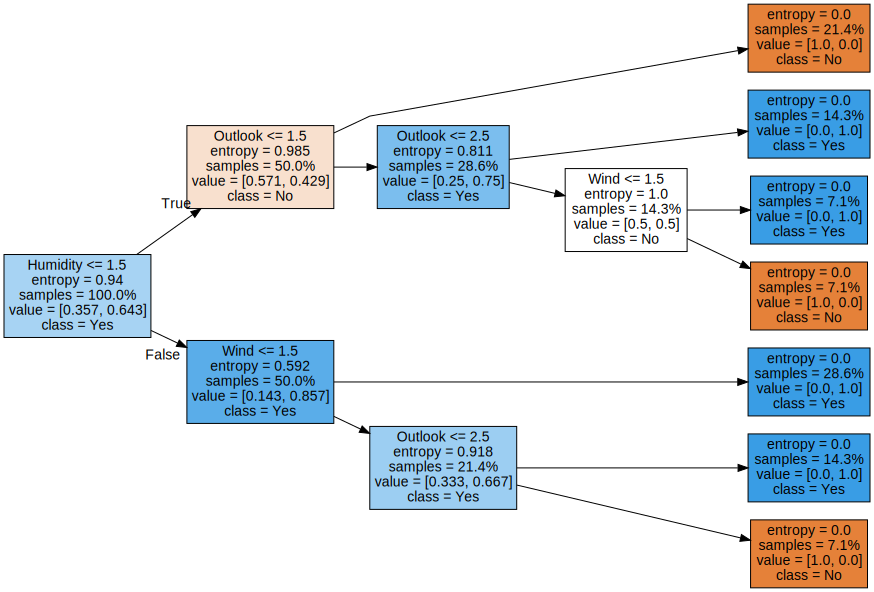

In [11]:
feature_names = ['Outlook', 'Temperature', 'Humidity', 'Wind']
class_names = ['No', 'Yes']
myTreeData = tree.export_graphviz(myTree, feature_names=feature_names,
                                  class_names=class_names, leaves_parallel=True,
                                  filled=True, proportion=True, rotate=True)
graphData = graphviz.Source(myTreeData)
graphData

Ahora podemos controlar la compleidad del árbol de diferentes maneras:

- Limitar la complejidad a la que se puede llegar, definiendo la profundidad máxima (*max_depth*).
- Limitar la cantidad de muestras en un nodo sin que sea necesario expandirlo (*min_samples_split*)

[Text(0.5, 0.8333333333333334, 'x[2] <= 1.5\nentropy = 0.94\nsamples = 14\nvalue = [5, 9]'),
 Text(0.25, 0.5, 'x[0] <= 1.5\nentropy = 0.985\nsamples = 7\nvalue = [4, 3]'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.811\nsamples = 4\nvalue = [1, 3]'),
 Text(0.75, 0.5, 'x[3] <= 1.5\nentropy = 0.592\nsamples = 7\nvalue = [1, 6]'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.918\nsamples = 3\nvalue = [1, 2]')]

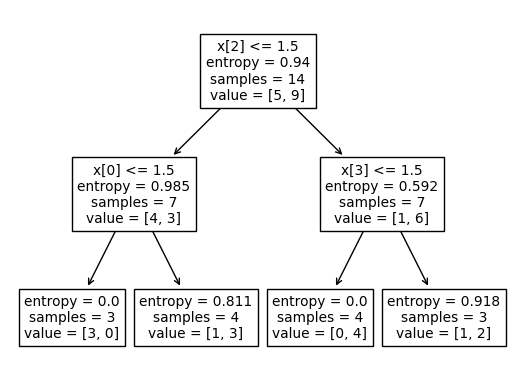

In [13]:
# Usando max_depth

myTree2 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=2)
myTree2.fit(df_x, df_y)
tree.plot_tree(myTree2)

[Text(0.5, 0.875, 'x[2] <= 1.5\nentropy = 0.94\nsamples = 14\nvalue = [5, 9]'),
 Text(0.25, 0.625, 'x[0] <= 1.5\nentropy = 0.985\nsamples = 7\nvalue = [4, 3]'),
 Text(0.125, 0.375, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.375, 0.375, 'x[0] <= 2.5\nentropy = 0.811\nsamples = 4\nvalue = [1, 3]'),
 Text(0.25, 0.125, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.5, 0.125, 'entropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.75, 0.625, 'x[3] <= 1.5\nentropy = 0.592\nsamples = 7\nvalue = [1, 6]'),
 Text(0.625, 0.375, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.875, 0.375, 'entropy = 0.918\nsamples = 3\nvalue = [1, 2]')]

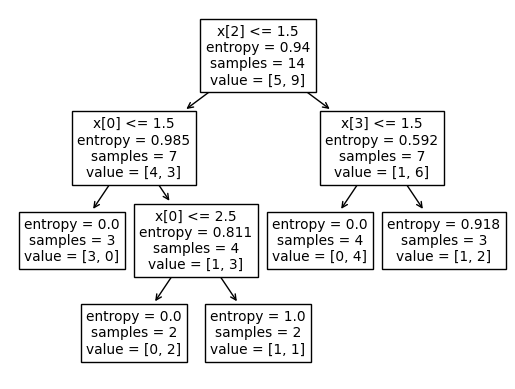

In [14]:
# Utilizando min_samples_split

myTree3 = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=4)
myTree3.fit(df_x, df_y)
tree.plot_tree(myTree3)

Ahora vamos a hacer predicciones.



In [15]:
import numpy as np

#Test predictions with:
#   Outlook     = Sunny (1)
#   Temperature = Hot (1)
#   Humidity    = High (1)
#   Wind        = Strong (2)

day1 = np.array([[1, 1, 1, 2]])

#Test predictions with:
#   Outlook     = Sunny (2)
#   Temperature = Hot (1)
#   Humidity    = High (1)
#   Wind        = Strong (2)

day2 = np.array([[2, 1, 1, 2]])

day3 = [[2, 1, 1, 2]] #same as day2
day4 = [df_x.loc[0]]

In [17]:
print('First forecast: ')
print('T1', myTree.predict_proba(day1), '--->', myTree.predict(day1))
print('T2', myTree2.predict_proba(day1), '--->', myTree2.predict(day1))

print('Second forecast: ')
print('T1', myTree.predict_proba(day2), '--->', myTree.predict(day2))
print('T2', myTree2.predict_proba(day2), '--->', myTree2.predict(day2))

print('Third forecast: ')
print('T1', myTree.predict_proba(day3), '--->', myTree.predict(day3))
print('T2', myTree2.predict_proba(day3), '--->', myTree2.predict(day3))

print('Fourth forecast: ')
print('T1', myTree.predict_proba(day4), '--->', myTree.predict(day4))
print('T2', myTree2.predict_proba(day4), '--->', myTree2.predict(day4))

First forecast: 
T1 [[1. 0.]] ---> [0]
T2 [[1. 0.]] ---> [0]
Second forecast: 
T1 [[0. 1.]] ---> [1]
T2 [[0.25 0.75]] ---> [1]
Third forecast: 
T1 [[0. 1.]] ---> [1]
T2 [[0.25 0.75]] ---> [1]
Fourth forecast: 
T1 [[1. 0.]] ---> [0]
T2 [[1. 0.]] ---> [0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X